In [1]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, GaussianNoise , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
import numpy as np


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#dataset with preprocessing
# 1- preprocessing the training set

train_data_generation = ImageDataGenerator()
training_set = train_data_generation.flow_from_directory('/content/drive/MyDrive/Alzheimer_s Dataset/train',
                                                         target_size=(224, 224))


Found 5121 images belonging to 4 classes.


In [7]:
label_map_training_set = (training_set.class_indices)
print(label_map_training_set)

{'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}


In [8]:
# 1- preprocessing the testing set
test_data_generation = ImageDataGenerator()
testing_set = test_data_generation.flow_from_directory('/content/drive/MyDrive/Alzheimer_s Dataset/test',
                                                       target_size=(224, 224))



Found 1279 images belonging to 4 classes.


In [9]:
label_map_testing_set = (testing_set.class_indices)
print(label_map_testing_set)

{'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}


In [10]:

model = Sequential([

    # adding the 1 layer
    Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[224, 224, 3]),
    BatchNormalization(),
    
    # adding the 2 layer
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    # adding the 3 layer
    Conv2D(filters=128, kernel_size=3, activation='relu'),
    GaussianNoise(0.01),
    BatchNormalization(),
    Dropout(0.1),

    # adding the 4 layer
    Conv2D(filters=128, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    # adding the 5 layer
    Conv2D(filters=256, kernel_size=3, activation='relu'),
    BatchNormalization(),

    # adding the 6 layer
    Conv2D(filters=256, kernel_size=3, activation='relu'),
    
    # adding the 7 layer
    Conv2D(filters=256, kernel_size=3, activation='relu'),
    GaussianNoise(0.01),

    # adding the 8 layer
    Conv2D(filters=256, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    # adding the 9 layer
    Conv2D(filters=512, kernel_size=3, activation='relu'),
    
    # adding the 10 layer
    Conv2D(filters=512, kernel_size=3, activation='relu'),

    # adding the 11 layer
    Conv2D(filters=512, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.1),

    # adding the 12 layer
    Conv2D(filters=512, kernel_size=3, activation='relu'),
    GaussianNoise(0.01),

    # adding the 13 layer
    Conv2D(filters=512, kernel_size=3, activation='relu'),
    
    # adding the 14 layer
    Conv2D(filters=512, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.1),

    # adding the 15 layer
    Flatten(),

    # adding the 16 layer
    Flatten(),

    # adding the 17 layer
    # Concatenait .............

    # adding the 18 layer
    Dense(units=256, activation='relu'),

    # adding the 19 layer
    Dense(units=256, activation='relu'),


    # adding the 20 layer
    # output layer
    Dense(units=4, activation='softmax')

])


In [11]:

# let's look at the structure of the model we just created
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 gaussian_noise (GaussianNoi  (None, 108, 108, 128)    0

In [12]:
# compiling the model
model.compile(optimizer=tf.optimizers.Adamax(learning_rate=0.001), loss = tf.losses.CategoricalCrossentropy() , metrics = ['accuracy'])

In [14]:
#fitting the model
history = model.fit(x=training_set, validation_data=testing_set, epochs=20)

Epoch 1/20
161/161 [==============================] - 810s 5s/step - loss: 0.9956 - accuracy: 0.5128 - val_loss: 0.9816 - val_accuracy: 0.5301
Epoch 2/20
161/161 [==============================] - 70s 436ms/step - loss: 0.9049 - accuracy: 0.5638 - val_loss: 0.8985 - val_accuracy: 0.5457
Epoch 3/20
161/161 [==============================] - 71s 443ms/step - loss: 0.8599 - accuracy: 0.5950 - val_loss: 0.9147 - val_accuracy: 0.5645
Epoch 4/20
161/161 [==============================] - 73s 453ms/step - loss: 0.8788 - accuracy: 0.5829 - val_loss: 0.8869 - val_accuracy: 0.5614
Epoch 5/20
161/161 [==============================] - 73s 453ms/step - loss: 0.7958 - accuracy: 0.6159 - val_loss: 1.2123 - val_accuracy: 0.5606
Epoch 6/20
161/161 [==============================] - 73s 454ms/step - loss: 0.7459 - accuracy: 0.6493 - val_loss: 0.8970 - val_accuracy: 0.5676
Epoch 7/20
161/161 [==============================] - 73s 454ms/step - loss: 0.6895 - accuracy: 0.6782 - val_loss: 1.0114 - val_accu

In [18]:
#saving the model
model.save('/content/drive/MyDrive/Alzheimer_s Dataset/ADFINAL.h5')

In [19]:
CATEGORIES = ['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']

In [28]:
# Plot the loss and accuracy curves for training and validation 
import plotly.graph_objs as go
import plotly.offline as py
val_accuracy = history.history['accuracy']

accuracy = []
num_of_epochs = []
for i in range(1,20):
    accuracy.append(round(100*val_accuracy[i],3))
    num_of_epochs.append(i)

trace1 = go.Scatter(y = accuracy, x = num_of_epochs, mode = "lines")
data = [trace1]
layout = dict(title = 'CNN Accuracy',
              autosize=False,
              width=1000,
              height=800,
              yaxis= dict(title= 'Accuracy (%)',gridwidth=2, gridcolor='#bdbdbd'),
              xaxis= dict(title= 'Number of Epochs',gridwidth=2, gridcolor='#bdbdbd'),
              font=dict(size=14)
             )
fig = dict(data = data, layout = layout)
py.iplot(fig)

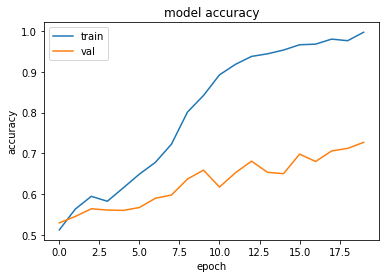

In [22]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

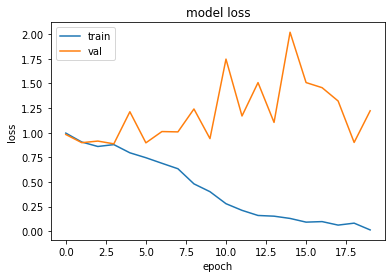

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [30]:
cnn = load_model('/content/drive/MyDrive/Alzheimer_s Dataset/ADFINAL.h5')
image = load_img('/content/26 (69).jpg', target_size=(224, 224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
result = cnn.predict(image)
print(result[0])

result = result.argmax(axis=1)[0]
print(result)
result = CATEGORIES[result]
print(result)


[2.2878515e-04 2.1995882e-06 9.9171597e-01 8.0530867e-03]
2
NonDemented
